In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations, combinations
import pynauty as pn

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    list1=[list(combinations(s, r)) for r in range(len(s)+1)]
    list2=[]
    for mini in list1:
      list2=list2+mini
    return list2

def max_length(list1):
  max1=0
  for i in list1:
    long=len(i)
    if long>max1:
      max1=long
  return max1

def ContainsJ5(graph):
  #finds maximal cliques of the graph
  all_cliques=list(nx.enumerate_all_cliques(graph))
  max_length_cliques=max_length(all_cliques)
  if max_length_cliques>4:
    #means it contains a k5, so we done
    return True
  elif max_length_cliques<3:
    #too small
    return False
  elif max_length_cliques==4:
    max_cliques=[c for c in all_cliques if len(c)==4]
    for cliqueA in max_cliques:
      for cliqueB in max_cliques:
        #checks if 2 4-cliques are only different by one vertex
        union=set(cliqueA).union(set(cliqueB))
        if len(union)==5:
          return True
    return False
  else:
    print("the fuck happened?")

def ContainsJ3(graph):
  #finds maximal cliques of the graph
  all_cliques=list(nx.enumerate_all_cliques(graph))
  max_length_cliques=max_length(all_cliques)
  if max_length_cliques>2:
    #means it contains a k3, so we done
    return True
  elif max_length_cliques<2:
    #too small
    return False
  elif max_length_cliques==2:
    max_cliques=[c for c in all_cliques if len(c)==2]
    for cliqueA in max_cliques:
      for cliqueB in max_cliques:
        #checks if 2 2-cliques are only different by one vertex
        union=set(cliqueA).union(set(cliqueB))
        if len(union)==3:
          return True
    return False
  else:
    print("the fuck happened?")

def convertNetworkXGraph(nx_graph):
    pn_graph = pn.Graph(len(nx_graph))
    for n in nx_graph:
        list_neighbors = []
        for nbs in nx_graph[n]:
            list_neighbors.append(nbs)
        pn_graph.connect_vertex(n, list_neighbors)
    return pn_graph

def Up_to_automorphism(list_of_nx_graphs):
  final_list=[]
  count=133632
  for graph1 in list_of_nx_graphs:
    add_me=True
    count-=1
    for graph2 in final_list:
      if nx.faster_could_be_isomorphic(graph1,graph2) and nx.fast_could_be_isomorphic(graph1, graph2) and nx.is_isomorphic(graph1, graph2) :
        add_me=False
        break
    if add_me:
      final_list.append(graph1)
      #purely to track progress of the counting
    if len(final_list)%1000==0:
      print(len(final_list),count)
  return final_list

def ContainsAntiK5(graph):
  max_IS=max_length(list(nx.find_cliques(nx.complement(graph))))
  return max_IS>=5

test_graph=nx.complete_graph(5)
test_graph.remove_edge(1,2)
print(ContainsJ5(test_graph))

True


**Census of $P(J_3,K_5, m)$** for $1\leq m\leq 8$

In [2]:
#Now to find all of R(J3,K5)
#Only have to check for n<9

#The graph atlas gives us all cases up to 7.
Pj3k5=[]
for n in range(0,1253):
  graph=nx.graph_atlas(n)
  if not ContainsAntiK5(graph) and not ContainsJ3(graph):
    Pj3k5+=[graph.copy()]
print(Pj3k5)
print(len(Pj3k5))
#This gives us the first few cases

[<networkx.classes.graph.Graph object at 0x10dbf24d0>, <networkx.classes.graph.Graph object at 0x10dbf2c90>, <networkx.classes.graph.Graph object at 0x10dbf5890>, <networkx.classes.graph.Graph object at 0x10dbf7ad0>, <networkx.classes.graph.Graph object at 0x10dbd61d0>, <networkx.classes.graph.Graph object at 0x10dbf7590>, <networkx.classes.graph.Graph object at 0x10dbd7610>, <networkx.classes.graph.Graph object at 0x10dbd5910>, <networkx.classes.graph.Graph object at 0x10dbf79d0>, <networkx.classes.graph.Graph object at 0x10dc07a90>, <networkx.classes.graph.Graph object at 0x115fb7e90>, <networkx.classes.graph.Graph object at 0x11abb3a90>, <networkx.classes.graph.Graph object at 0x11669a0d0>, <networkx.classes.graph.Graph object at 0x115fcfa10>]
14


In [3]:
#n=8 case
#Gonna take all the graphs with 7 vertices, add another vertex in 2^7 ways, then reduce up to isomorphism
list_8v_part_labeled=[]
Possible_edges=[(7,0),(7,1),(7,2),(7,3),(7,4),(7,5),(7,6)]
#all the ways to add edges
combos_to_check=powerset(Possible_edges)
#all graphs with 7 vertices
G7s_to_check=[nx.graph_atlas(i) for i in range(209,1253)]
print(len(combos_to_check))
print(len(G7s_to_check))
#take all the ways to do each of these
for combo in combos_to_check:
    for G7 in G7s_to_check:
        G8=G7.copy()
        G8.add_node(7)
        G8.add_edges_from(combo)
        list_8v_part_labeled.append(G8.copy())
print(len(list_8v_part_labeled))

128
1044
133632


In [4]:
#reduce up to isomorphism
Graphs_w_8v=[]
hash_set=set()
for nx_graph in list_8v_part_labeled:
    pn_graph = convertNetworkXGraph(nx_graph)
    cert = pn.certificate(pn_graph)
    if cert not in hash_set:
        hash_set.add(cert)
        Graphs_w_8v.append(nx_graph)
print(len(Graphs_w_8v))

12346


In [5]:
#store all the Graphs with 8 vertices just in case
#with open("Graphs_w_8v_nx_save.txt","wb") as f:
  #for graph in Graphs_w_8v:
    #nx.write_graph6(graph,f,header=True)

In [6]:
#check all of the graphs with 8 vertices and see if they contain a J3 or Independent set of size 5.
for current_graph in Graphs_w_8v:
  if not ContainsJ3(current_graph) and not ContainsAntiK5(current_graph):
    Pj3k5+=[current_graph.copy()]
print(len(Pj3k5))

15


In [7]:
#Saving as a txt file
with open("Pj3k5.txt","wb") as f:
  for graph in Pj3k5:
    nx.write_graph6(graph,f,header=False) 

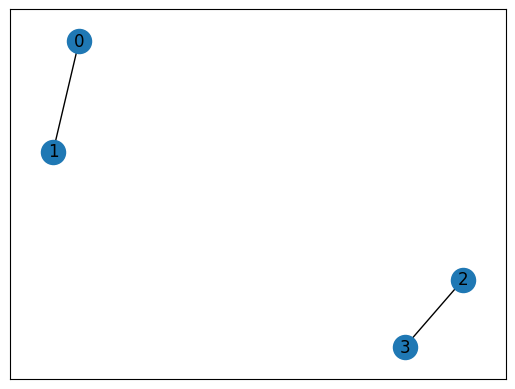

In [8]:
#graph atlas checking
nx.draw_networkx(Pj3k5[8])